In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
import os

In [2]:
dataset = np.load(r"D:\HaAnh\AimCLR-v2-main\data_cobot\train.pickle", allow_pickle=True)

In [3]:
dataset

{'pose': [array([[[ 0.        ,  0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        ],
          ...,
          [ 0.2216087 ,  0.90915227, -0.19503355],
          [ 0.52771515,  1.08817148, -0.55672747],
          [ 0.20693985,  1.12379074, -0.44870424]],
  
         [[ 0.        ,  0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        ],
          ...,
          [ 0.20836627,  0.91365248, -0.21589652],
          [ 0.50543785,  1.10901654, -0.59899032],
          [ 0.15734904,  1.10260642, -0.4979116 ]],
  
         [[ 0.        ,  0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        ],
          [ 0.        ,  0.        ,  0.        ],
          ...,
          [ 0.18961276,  0.9076134 , -0.23427822],
          [ 0.50413847,  1.11173236, -0.59887457],
          [ 0.12371773,  1.08577657, -0.5194391 ]],
  
         ...,
  


In [23]:
pose= dataset['pose']

In [7]:
frame = []
for data in pose:
    print(data.shape)
    frame.append(data.shape[0])


(89, 48, 3)
(49, 48, 3)
(36, 48, 3)
(207, 48, 3)
(42, 48, 3)
(161, 48, 3)
(31, 48, 3)
(69, 48, 3)
(42, 48, 3)
(37, 48, 3)
(51, 48, 3)
(65, 48, 3)
(28, 48, 3)
(79, 48, 3)
(35, 48, 3)
(41, 48, 3)
(67, 48, 3)
(35, 48, 3)
(30, 48, 3)
(98, 48, 3)
(53, 48, 3)
(34, 48, 3)
(27, 48, 3)
(194, 48, 3)
(52, 48, 3)
(64, 48, 3)
(52, 48, 3)
(78, 48, 3)
(52, 48, 3)
(69, 48, 3)
(83, 48, 3)
(34, 48, 3)
(35, 48, 3)
(76, 48, 3)
(44, 48, 3)
(28, 48, 3)
(82, 48, 3)
(37, 48, 3)
(39, 48, 3)
(30, 48, 3)
(69, 48, 3)
(31, 48, 3)
(30, 48, 3)
(22, 48, 3)
(80, 48, 3)
(27, 48, 3)
(91, 48, 3)
(58, 48, 3)
(98, 48, 3)
(58, 48, 3)
(31, 48, 3)
(31, 48, 3)
(25, 48, 3)
(27, 48, 3)
(58, 48, 3)
(83, 48, 3)
(35, 48, 3)
(40, 48, 3)
(82, 48, 3)
(42, 48, 3)
(33, 48, 3)
(74, 48, 3)
(34, 48, 3)
(63, 48, 3)
(63, 48, 3)
(218, 48, 3)
(30, 48, 3)
(181, 48, 3)
(36, 48, 3)
(67, 48, 3)
(46, 48, 3)
(41, 48, 3)
(48, 48, 3)
(44, 48, 3)
(79, 48, 3)
(90, 48, 3)
(48, 48, 3)
(92, 48, 3)
(41, 48, 3)
(51, 48, 3)
(88, 48, 3)
(47, 48, 3)
(83, 48, 3)

PREPROCESS THEO CODE A TÙNG

In [ ]:
from cleaning import clean_micro_gaps

data_clean_train = []
stat_list = []
for data in pose:
    data_clean, stat = clean_micro_gaps(data)
    data_clean_train.append(data_clean)
    stat_list.append(stat)

frame = []
for data in data_clean_train:
    print(data.shape)
    frame.append(data.shape[0])

In [10]:
data_clean_train

[array([[[ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         ...,
         [ 0.2216087 ,  0.90915227, -0.19503355],
         [ 0.52771515,  1.08817148, -0.55672747],
         [ 0.20693985,  1.12379074, -0.44870424]],
 
        [[ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         ...,
         [ 0.20836627,  0.91365248, -0.21589652],
         [ 0.50543785,  1.10901654, -0.59899032],
         [ 0.15734904,  1.10260642, -0.4979116 ]],
 
        [[ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ],
         ...,
         [ 0.18961276,  0.9076134 , -0.23427822],
         [ 0.50413847,  1.11173236, -0.59887457],
         [ 0.12371773,  1.08577657, -0.5194391 ]],
 
        ...,
 
        [[ 0.        ,  0.        

In [11]:
import copy
from scipy.signal import medfilt
import scipy.ndimage.interpolation as inter

def zoom(p, target_l=60, joints_num=48, joints_dim=3):
    p_copy = copy.deepcopy(p)
    l = p_copy.shape[0]
    p_new = np.empty([target_l, joints_num, joints_dim])
    for m in range(joints_num):
        for n in range(joints_dim):
            # p_new[:, m, n] = medfilt(p_new[:, m, n], 3) # make no sense. p_new is empty.
            p_copy[:, m, n] = medfilt(p_copy[:, m, n], 3)
            p_new[:, m, n] = inter.zoom(p_copy[:, m, n], target_l/l)[:target_l]
    return p_new

In [13]:
data_clean_train_sample = []
for data in data_clean_train:
    data_sample = zoom(data)
    data_clean_train_sample.append(data_sample)

processed_train = np.asarray(data_clean_train_sample)

C:\Users\Nguyen Ha Anh\AppData\Local\Temp\ipykernel_8088\193001802.py:13: DeprecationWarning: Please import `zoom` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  p_new[:, m, n] = inter.zoom(p_copy[:, m, n], target_l/l)[:target_l]


In [14]:
processed_train.shape

(1709, 60, 48, 3)

In [28]:
data = pose[0]
data.shape

(89, 48, 3)

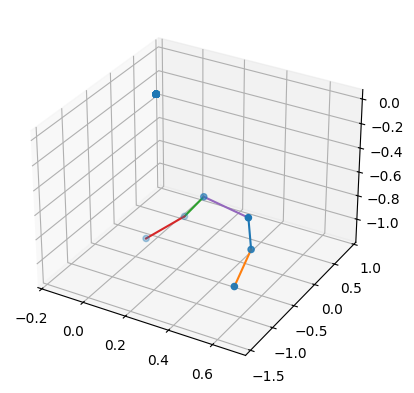

In [29]:
import matplotlib.animation as animation
skeletonConnectionMap = [
    [42, 44], 
    [44, 46],
    [43, 45], 
    [45, 47],
    [42, 43],

    [0, 1], [1,2] ,[2,3], [3,4],
    [0, 5], [5,6], [6,7], [7,8],
    [9,10], [10,11], [11,12],
    [13,14], [14,15], [15,16],
    [0,17], [17,18], [18,19], [19,20],

    [21, 22], [22, 23], [23, 24], [24, 25],
    [21, 26], [26, 27], [27, 28], [28, 29],
    [30, 31], [31, 32], [32, 33],
    [34, 35], [35, 36], [36, 37],
    [21, 38], [38, 39], [39, 40], [40, 41]

    ]


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

def visualize(data, nframe):

    x = data[nframe, :, 0]
    y = data[nframe, :, 2]
    z = data[nframe, :, 1]*(-1)

    lines=[]
    for connection in skeletonConnectionMap:
        i, j = connection
        line, = ax.plot(
            [data[nframe,i,0], data[nframe, j, 0]],
            [data[nframe,i,2], data[nframe, j, 2]],
            [data[nframe,i,1]*(-1), data[nframe, j, 1]*(-1)],
        )
        lines.append(line)

    scat = ax.scatter(x,y,z)
    ax.set_xlim(np.min(x)-0.2, np.max(x)+0.2)
    ax.set_ylim(np.min(y)-1, np.max(y)+1)
    ax.set_zlim(np.min(z)-0.05, np.max(z)+0.05)

    return scat, lines

def update(nframe, data, scat, lines):
    # for each frame, update the data stored on each artist.
    x = data[nframe, :, 0]
    y = data[nframe, :, 2]
    z = data[nframe, :, 1]*(-1)
    # update the scatter plot:
    scat._offsets3d = (x, y, z)
    # update the line plot:
    for idx, (i, j) in enumerate(skeletonConnectionMap):
        lines[idx].set_data([x[i], x[j]], [y[i], y[j]])
        lines[idx].set_3d_properties([z[i], z[j]])

    return scat,lines

scat, lines = visualize(data,0)
ani = animation.FuncAnimation(fig, func=update, frames=data.shape[0], fargs=(data, scat, lines), interval=30)
ani.save('test_original.mp4')

plt.show()


In [18]:
np.save("train_data_v2.npy", X)

In [19]:
y = np.array(dataset['label'])

In [9]:
y.shape

(1709,)

In [16]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [20]:
import pickle
with open("train_label_v2.pkl", 'wb') as file:
    pickle.dump(y, file)

In [7]:
y = np.array(label[1])

NameError: name 'label' is not defined